### 아파트 가격 예측 모델 제작 (다항회귀)
자동으로 속성을 늘려준다. 피쳐가 얼마 없을 때 효과적이다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [4]:
# 데이터 불러오기
apart_df = pd.read_csv('../data/new_apart_data_preprocessing_outlier.csv')
apart_df.head()
apart_df.drop(columns=['Unnamed: 0','building_usage','deal_type', 'contract_month', 'contract_year', 'subway_line', 'floor', 'sub_lot_num', 'main_lot_num', ], inplace=True)

In [5]:
# 2022~2024년 데이터를 테스트셋으로, 나머지를 훈련셋으로 분리
train_df = apart_df[~apart_df['receipt_year'].isin([2022, 2023, 2024])]
test_df = apart_df[apart_df['receipt_year'].isin([2022, 2023, 2024])]

# X, y 분리
X_train = train_df.drop('price_euk', axis=1).select_dtypes(include=['number'])
y_train = train_df['price_euk']

X_test = test_df.drop('price_euk', axis=1).select_dtypes(include=['number'])
y_test = test_df['price_euk']

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31441, 13) (102982, 13) (31441,) (102982,)


In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [13]:
print(X_train_poly.shape)
print(X_test_poly.shape)

(31441, 559)
(102982, 559)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

<Axes: >

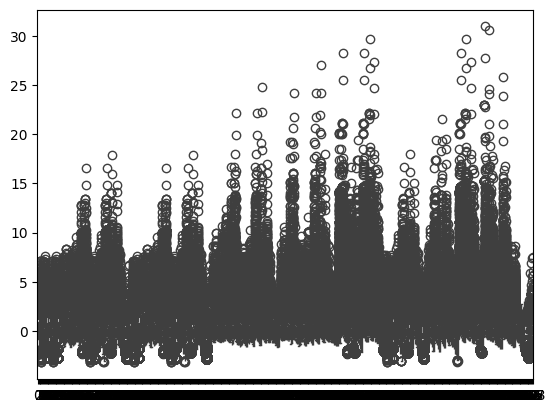

In [15]:
sns.boxplot(X_train_poly_scaled)

In [16]:
# 0. 모델 모듈 불러오기
from sklearn.linear_model import LinearRegression

# 1. 모델 생성
model = LinearRegression()

# 2. 훈련데이터로 모델 훈련
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# ------------------------------------------
# 평가 방법 선택 : MSE, MAE, RMSE, R2
# ------------------------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
# ------------------------------------------
# 테스트 데이터의 예측값
#   pred
# ------------------------------------------
pred = model.predict(X_test)

# ------------------------------------------
# 모델 평가 
#   - 예측값과 실제값의 차이(Loss/Error) 이용
# ------------------------------------------
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'mse: {mse:.4f}')
print(f'mae: {mae:.4f}')
print(f'rmse: {rmse:.4f}')
print(f'r2: {r2:.4f}')

mse: 7.7840
mae: 1.5889
rmse: 2.7900
r2: 0.8949
